In [1]:
import pandas as pd
df = pd.read_csv('labeled_data.txt', sep='---')
df.columns = ['phrase', 'ref']

df.loc[df['ref'].str[0] == 'n', 'ref'] = 'mixed' 
df.loc[df['ref'].str[0] == 'i', 'ref'] = 'internal'
df.loc[df['ref'].str[0] == 'e', 'ref'] = 'external'
# df = df.astype({'ref': 'int32'})

/var/folders/b7/1dkc5kgn7y7f_ppjp4c4vmdr0000gn/T/ipykernel_61162/3071845117.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('labeled_data.txt', sep='---')


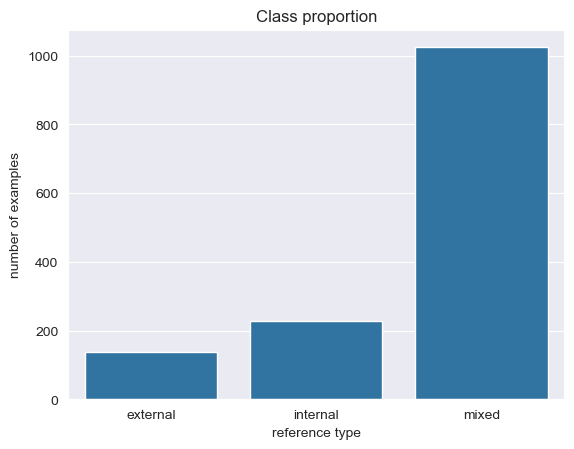

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

sns.countplot(data=df.sort_values(by='ref'), x = 'ref')

plt.xlabel('reference type')
plt.ylabel('number of examples')
plt.title('Class proportion')

plt.show()

In [3]:
df_int = pd.read_csv('gpt_generated_internal.txt', sep='---')
df_int['ref'] = 'internal'

df_ext = pd.read_csv('gpt_generated_external.txt', sep='---')
df_ext['ref'] = 'external'

/var/folders/b7/1dkc5kgn7y7f_ppjp4c4vmdr0000gn/T/ipykernel_61162/2539642753.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_int = pd.read_csv('gpt_generated_internal.txt', sep='---')
/var/folders/b7/1dkc5kgn7y7f_ppjp4c4vmdr0000gn/T/ipykernel_61162/2539642753.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_ext = pd.read_csv('gpt_generated_external.txt', sep='---')


In [4]:
df_both = pd.concat([df_int, df_ext]).reset_index()
df_both.drop(columns=['index'], inplace=True)

In [5]:
df = pd.concat([df, df_both]).reset_index()
df.drop(columns=['index'], inplace=True)

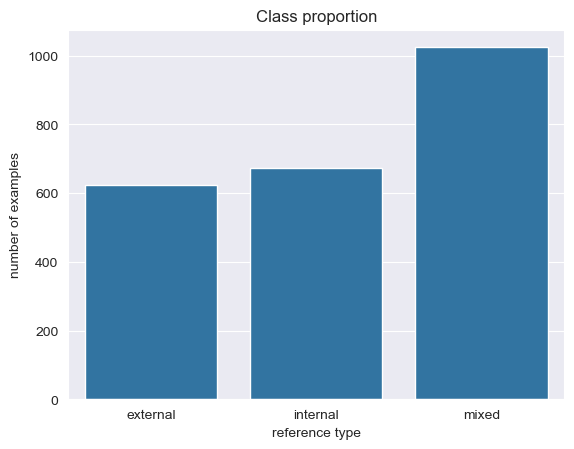

In [6]:
sns.countplot(data=df.sort_values(by='ref'), x='ref')

plt.xlabel('reference type')
plt.ylabel('number of examples')
plt.title('Class proportion')

plt.show()

In [7]:
df.to_csv('data.csv', index=None)